In [ ]:
from backward_mode_differentiation.tensor import Tensor
from backward_mode_differentiation.tensorFunction import tensorFn
from nnclass import MNISTNet 
import numpy as np

In [2]:
train_image_path = "train_images.pkl"
train_label_path = "train_images_label.pkl"

test_image_path = "testing_images.pkl"
test_label_path = "testing_images_label.pkl"


In [3]:
import pickle
with open(train_image_path, "rb") as f:
    train_images = pickle.load(f)

with open(test_image_path, "rb") as f:
    test_images = pickle.load(f)

In [4]:
with open(train_label_path, "rb") as f:
    train_label = pickle.load(f)

with open(test_label_path, "rb") as f:
    test_label = pickle.load(f)

In [5]:
import matplotlib.pyplot as plt

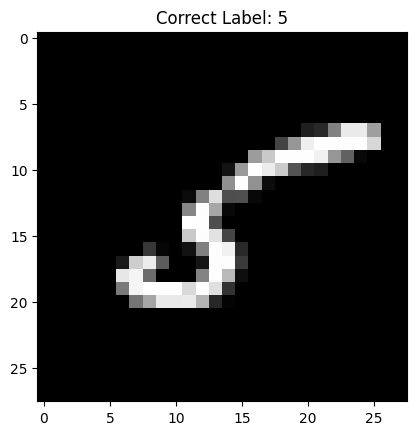

In [6]:
plt.imshow(train_images[11].reshape(28, 28), cmap='gray')
plt.title(f"Correct Label: {train_label[11]}")
plt.show()

In [7]:
model = MNISTNet()

In [8]:
x1 = Tensor(train_images[0])
output = model.forward(x1)
output.value

array([[ 0.00198204,  0.00299611, -0.00024528,  0.00017727,  0.00022582,
        -0.00355191, -0.0005948 , -0.00135802, -0.00210474,  0.00073459]],
      dtype=float32)

In [9]:
import pandas as pd 

In [10]:
train_images = [Tensor(train_images[i]) for i in range(len(train_images))]

In [11]:
df = pd.DataFrame({"images" : train_images, "label" : train_label})

In [12]:
df.head()

,images,label
0,<tensor.Tensor object at 0x73a4f47eff20>,5
1,<tensor.Tensor object at 0x73a539f6fcb0>,0
2,<tensor.Tensor object at 0x73a4f31b1b20>,4
3,<tensor.Tensor object at 0x73a4f416a510>,1
4,<tensor.Tensor object at 0x73a4f2d0b6b0>,9


In [13]:
epochs = 100
lr = 0.01
overtime_loss = []
for e in range(epochs):
    total_loss = 0
    for i in range(len(df)):
        image_vector = df["images"].iloc[i]
        image_label = df["label"].iloc[i]

        output = model.forward(image_vector)
        loss = tensorFn.cross_entropy_loss(output, image_label)

        model.zero_grad()
        loss.backward()
        model.step(lr)
        total_loss += loss.value[0][0]
    avg_loss = total_loss/len(df)
    print(f"iteration number: {e+1} avgerage loss: {avg_loss}")
    overtime_loss.append(avg_loss)

iteration number: 1 avgerage loss: 2.302722454071045
iteration number: 2 avgerage loss: 2.2853901386260986
iteration number: 3 avgerage loss: 2.163153886795044
iteration number: 4 avgerage loss: 1.7913137674331665
iteration number: 5 avgerage loss: 1.392143726348877
iteration number: 6 avgerage loss: 1.144141674041748
iteration number: 7 avgerage loss: 0.997635543346405
iteration number: 8 avgerage loss: 0.8954811096191406
iteration number: 9 avgerage loss: 0.8171283006668091
iteration number: 10 avgerage loss: 0.7577068209648132
iteration number: 11 avgerage loss: 0.7130016684532166
iteration number: 12 avgerage loss: 0.678672730922699
iteration number: 13 avgerage loss: 0.6515897512435913
iteration number: 14 avgerage loss: 0.6289802193641663
iteration number: 15 avgerage loss: 0.6101325154304504
iteration number: 16 avgerage loss: 0.5938487648963928
iteration number: 17 avgerage loss: 0.580085277557373
iteration number: 18 avgerage loss: 0.5677255988121033
iteration number: 19 avger

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

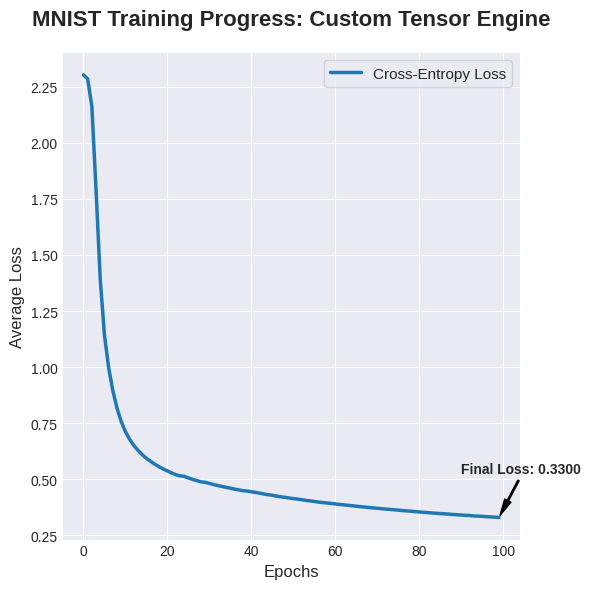

In [23]:
import matplotlib.pyplot as plt

def plot_training_loss(overtime_loss):
    # Set a professional style
    plt.style.use('seaborn-v0_8-darkgrid') 
    
    # Create the figure
    plt.figure(figsize=(6, 6))
    
    # Plot the loss with a distinct color and line width
    plt.plot(overtime_loss, color='#1f77b4', linewidth=2.5, label='Cross-Entropy Loss')
    
    # Add a title and labels
    plt.title('MNIST Training Progress: Custom Tensor Engine', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Average Loss', fontsize=12)
    
    # Add a legend
    plt.legend(frameon=True, fontsize=11)
    
    # Highlight the final loss value
    final_loss = overtime_loss[-1]
    plt.annotate(f'Final Loss: {final_loss:.4f}', 
                 xy=(len(overtime_loss)-1, final_loss), 
                 xytext=(len(overtime_loss)-10, final_loss + 0.2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 fontsize=10, fontweight='bold')

    # Ensure the layout is tight and clean
    plt.tight_layout()
    
    # Show it!
    plt.show()


plot_training_loss(overtime_loss)

In [18]:
test_images = [Tensor(test_images[i]) for i in range(len(test_images))]
df1 = pd.DataFrame({"images" : test_images, "label" : test_label})

In [19]:
predicted_label = []
for i in range(len(df1)):
        image_vector = df1["images"].iloc[i]
        label = model.output(image_vector)
        predicted_label.append(label[0])

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_label, df1["label"])

/tmp/ipykernel_22200/1229917027.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=True, fontsize=11)


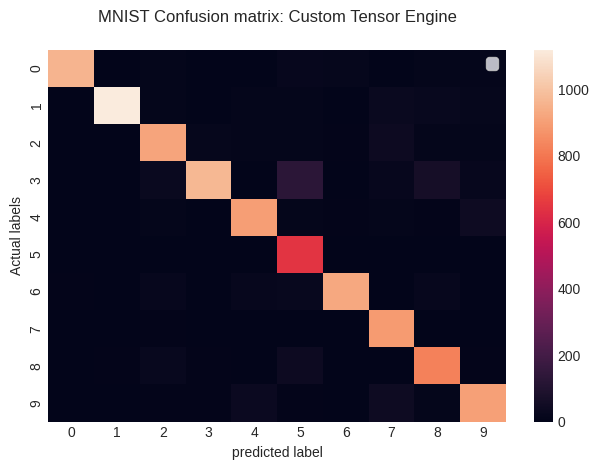

In [21]:
ax, fig = plt.subplots()
plt.style.use('seaborn-v0_8-darkgrid') 
sns.heatmap(cm)
plt.title('MNIST Confusion matrix: Custom Tensor Engine', fontsize=12, pad=20)
plt.xlabel("predicted label")
plt.ylabel("Actual labels")
plt.legend(frameon=True, fontsize=11)
plt.tight_layout()
plt.show();


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
accuracy = accuracy_score(predicted_label, df1["label"])
recall = recall_score(predicted_label, df1["label"], average="weighted")
precision = precision_score(predicted_label, df1["label"], average="weighted")
accuracy, recall, precision

(0.9044, 0.9044, 0.9122409493743702)

In [26]:
model_weights = {
    "W1": model.W1.value,
    "b1": model.b1.value,
    "W2": model.W2.value,
    "b2": model.b2.value
}
with open("model_weights.pkl", "wb") as f:
    pickle.dump(model_weights, f)